50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 334ms/step


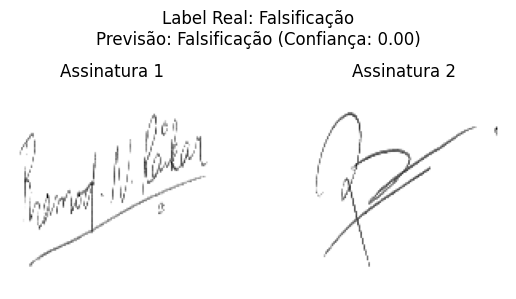

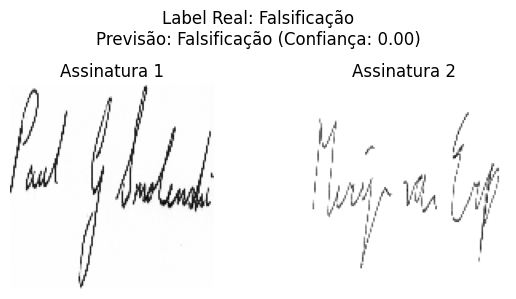

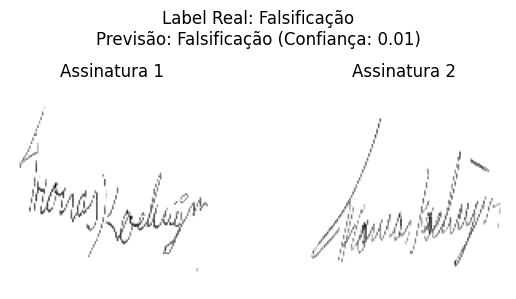

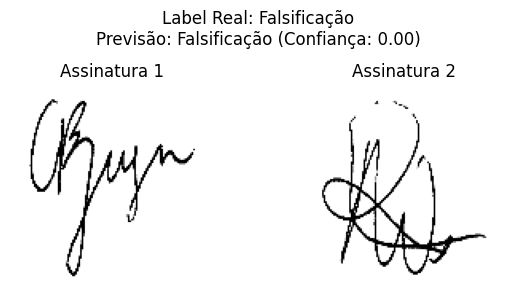

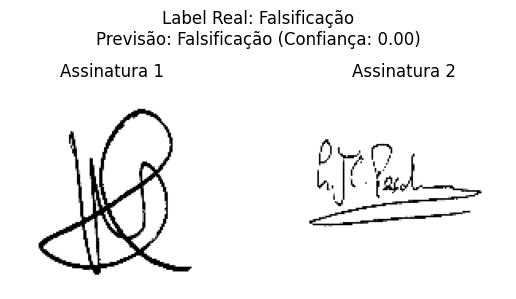

In [ ]:
#Teste

predictions = siamese_model.predict([X_val1, X_val2])

def show_results(index):
    img1 = X_val1[index].squeeze()
    img2 = X_val2[index].squeeze()

    label_real = y_val[index]
    predicao = predictions[index][0]

    plt.figure(figsize=(6, 3))

    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.title("Assinatura 1")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.title("Assinatura 2")
    plt.axis('off')

    plt.suptitle(f"Label Real: {'Genuína' if label_real == 1 else 'Falsificação'}\n"
                 f"Previsão: {'Genuína' if predicao > 0.5 else 'Falsificação'} (Confiança: {predicao:.2f})")

    plt.tight_layout()

    plt.show()
    plt.close()

#5 resultados aleatórios
for i in np.random.randint(0, len(X_val1), size=5):
    show_results(i)

In [ ]:
#Compilar e Treinar o Modelo
from sklearn.model_selection import train_test_split

siamese_model.compile(loss='binary_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])

X_train1, X_val1, X_train2, X_val2, y_train, y_val = train_test_split(
    pairs[:, 0], pairs[:, 1], labels, test_size=0.2, random_state=42
)

X_train1 = np.expand_dims(X_train1, axis=-1)
X_val1 = np.expand_dims(X_val1, axis=-1)
X_train2 = np.expand_dims(X_train2, axis=-1)
X_val2 = np.expand_dims(X_val2, axis=-1)

history = siamese_model.fit(
    [X_train1, X_train2], y_train,
    validation_data=([X_val1, X_val2], y_val),
    batch_size=32,
    epochs=10
)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 285s 1s/step - accuracy: 0.9604 - loss: 0.2837 - val_accuracy: 0.9731 - val_loss: 0.1548
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 270s 1s/step - accuracy: 0.9709 - loss: 0.1470 - val_accuracy: 0.9731 - val_loss: 0.1409
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 321s 1s/step - accuracy: 0.9740 - loss: 0.1158 - val_accuracy: 0.9731 - val_loss: 0.1322
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 323s 1s/step - accuracy: 0.9727 - loss: 0.1064 - val_accuracy: 0.9731 - val_loss: 0.1297
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step - accuracy: 0.9745 - loss: 0.0929 - val_accuracy: 0.9731 - val_loss: 0.1303
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.9727 - loss: 0.0857 - val_accuracy: 0.9731 - val_loss: 0.1304
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.9752 - loss: 0.0764 - val_accuracy: 0.9731 - val_loss: 0.1310
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 320s 1s/step - accuracy: 0.9718 - loss: 0.0806 - val_accu

In [ ]:
#Rede Neural Siamesa

def create_base_network():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
        MaxPooling2D(),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(128, activation='relu')
    ])
    return model

base_network = create_base_network()

input_a = tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 1))
input_b = tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 1))

processed_a = base_network(input_a)
processed_b = base_network(input_b)

distance = Lambda(lambda embeddings: tf.abs(embeddings[0] - embeddings[1]))([processed_a, processed_b])
prediction = Dense(1, activation='sigmoid')(distance)

siamese_model = Model(inputs=[input_a, input_b], outputs=prediction)
siamese_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 128)       │  7,391,744 │ input_layer_1[0]… │
│ (Sequential)        │                   │            │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 128)       │          0 │ sequential[0][0], │
│                     │                   │            │ sequential[1][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │        129 │ lambda[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,391,873 (28.20 MB)

 Trainable params: 7,391,873 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Carregar e Pré-processar as Imagens

data_dir = 'Dataset_Signature_Final/Dataset'

def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
    img = img / 255.0 #Normaliza os pixels para o intervalo [0, 1]
    return img

all_images = []
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            all_images.append(os.path.join(root, file))

pairs = []
labels = []

num_pairs = 8000

for i in range(num_pairs):
    if i % 1000 == 0:
        print(f"Processando par {i}/{num_pairs}...")

    img1_path, img2_path = np.random.choice(all_images, size=2, replace=False)

    person1_id = os.path.basename(img1_path)[2:5]
    person2_id = os.path.basename(img2_path)[2:5]

    img1 = preprocess_image(img1_path)
    img2 = preprocess_image(img2_path)

    pairs.append([img1, img2])

    #Definir o label (1 se for a mesma pessoa, 0 se for diferente)
    if person1_id == person2_id:
        labels.append(1.0)
    else:
        labels.append(0.0)

#Converter para arrays NumPy
pairs = np.array(pairs)
labels = np.array(labels)

print(f'\nFormato do array de pares: {pairs.shape}')
print(f'Formato do array de labels: {labels.shape}')

Processando par 0/8000...
Processando par 1000/8000...
Processando par 2000/8000...
Processando par 3000/8000...
Processando par 4000/8000...
Processando par 5000/8000...
Processando par 6000/8000...
Processando par 7000/8000...

Formato do array de pares: (8000, 2, 128, 128)
Formato do array de labels: (8000,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

IMG_WIDTH = 128
IMG_HEIGHT = 128
print("Bibliotecas importadas")

Bibliotecas importadas


In [ ]:
!unzip /content/Dataset_Signature_Final.zip

Archive:  /content/Dataset_Signature_Final.zip
   creating: Dataset_Signature_Final/
   creating: Dataset_Signature_Final/Dataset/
   creating: Dataset_Signature_Final/Dataset/dataset1/
   creating: Dataset_Signature_Final/Dataset/dataset1/forge/
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100001.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100002.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100003.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100004.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100005.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100006.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100007.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100008.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100009.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100010.png  
  i